In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
netflix_data = pd.read_csv('netflix_titles.csv')
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Text(0.5, 1.0, 'Data Sample')

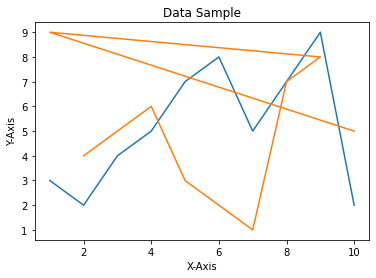

In [2]:
fig, ax = plt.subplots()
#creating some dummy data
ax.plot([1,2,3,4,5,6,7,8,9,10],[3,2,4,5,7,8,5,7,9,2], label= 'data1')
ax.plot([2,3,4,5,6,7,8,9,1,10],[4,5,6,3,2,1,7,8,9,5], label= 'data2')
ax.set_ylabel('Y-Axis')
ax.set_xlabel('X-Axis')
ax.set_title('Data Sample')


In [7]:
n_data = netflix_data.groupby(['release_year', 'type'], as_index=False).show_id.count()
n_data.columns = ['release_year', 'type', 'count']
n_data_pivot = n_data.pivot(index='release_year', columns='type', values='count').reset_index()
n_data_pivot.fillna(0, inplace = True)
n_data_pivot.head()


type,release_year,Movie,TV Show
0,1925,0.0,1.0
1,1942,2.0,0.0
2,1943,3.0,0.0
3,1944,3.0,0.0
4,1945,3.0,0.0


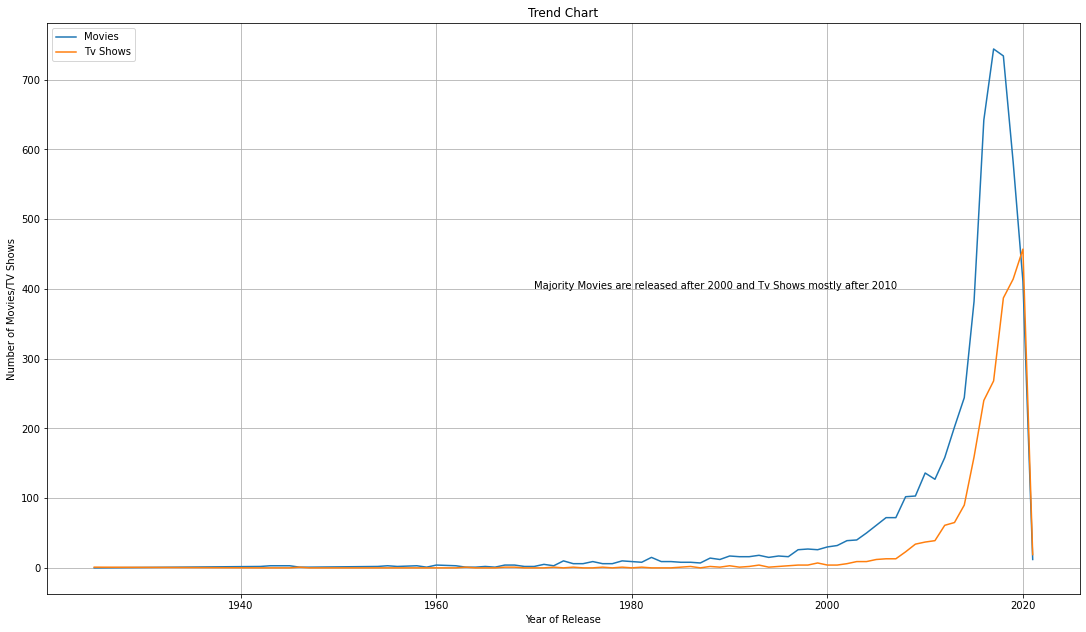

In [8]:
#  Declare a chart with one Axis
fig, ax = plt.subplots()  
# Creating some  dummy data
ax.plot(n_data_pivot.release_year, n_data_pivot.Movie, label = 'Movies')
ax.plot(n_data_pivot.release_year, n_data_pivot['TV Show'], label = 'Tv Shows') 
ax.set_ylabel('Number of Movies/TV Shows') 
ax.set_xlabel('Year of Release')
ax.set_title("Trend Chart")
plt.text(x=1970, y=400, s=r'Majority Movies are released after 2000 and Tv Shows mostly after 2010')#, fontsize = 12)
fig.set_size_inches(18.5, 10.5)
plt.grid()
ax.legend()